In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date

## Import Excel data

In [5]:
df = pd.read_excel('/Users/administrator/Desktop/gitHUB/Creating_visualizations_with_Spotify_data_ /MyData/StreamingHistory0.json.xlsx')

def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
df = pd.read_excel("StreamingHistory0.json.xlsx")
df

,endTime,date,wkday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
0,2021-09-29 18:56,2021-09-29,Wed,18:56,MiyaGi & Endspiel,I Got Love,194017,3.233617,Yes
1,2021-09-30 00:29,2021-09-30,Thu,00:29,MiyaGi & Endspiel,I Got Love,82922,1.382033,No
2,2021-09-30 00:34,2021-09-30,Thu,00:34,GUF,Лето на ветер,259799,4.329983,Yes
3,2021-09-30 00:40,2021-09-30,Thu,00:40,Aleksandr Ivanov,"Боже, Какой Пустяк",327520,5.458667,Yes
4,2021-09-30 00:43,2021-09-30,Thu,00:43,Manizha,I Love Too Much,195880,3.264667,Yes
...,...,...,...,...,...,...,...,...,...
1876,2022-09-30 21:20,2022-09-30,Fri,21:20,Anna Naklab,Supergirl - Radio Edit,212409,3.540150,Yes
1877,2022-09-30 21:25,2022-09-30,Fri,21:25,Son Little,Mad About You,213136,3.552267,Yes
1878,2022-09-30 21:38,2022-09-30,Fri,21:38,Rok-Ostrova,Ничего не говори,194046,3.234100,Yes
1879,2022-09-30 21:43,2022-09-30,Fri,21:43,Musia Totibadze,Правда о любви,245568,4.092800,Yes


In [6]:
#assigning a variable to the skipped songs, played for less than 2 minutes
skippedsongs = df[ df['Include Song'] == "No" ].index 

#dropping skipped songs
df.drop(skippedsongs, inplace = True) 

New data set without the songs played for <2min

In [7]:
df 

,endTime,date,wkday,time,artistName,trackName,msPlayed,minsPlayed,Include Song
0,2021-09-29 18:56,2021-09-29,Wed,18:56,MiyaGi & Endspiel,I Got Love,194017,3.233617,Yes
2,2021-09-30 00:34,2021-09-30,Thu,00:34,GUF,Лето на ветер,259799,4.329983,Yes
3,2021-09-30 00:40,2021-09-30,Thu,00:40,Aleksandr Ivanov,"Боже, Какой Пустяк",327520,5.458667,Yes
4,2021-09-30 00:43,2021-09-30,Thu,00:43,Manizha,I Love Too Much,195880,3.264667,Yes
5,2021-09-30 00:47,2021-09-30,Thu,00:47,Blank & Jones,Fallen,246186,4.103100,Yes
...,...,...,...,...,...,...,...,...,...
1875,2022-09-30 21:17,2022-09-30,Fri,21:17,Blank & Jones,Pura Vida,216259,3.604317,Yes
1876,2022-09-30 21:20,2022-09-30,Fri,21:20,Anna Naklab,Supergirl - Radio Edit,212409,3.540150,Yes
1877,2022-09-30 21:25,2022-09-30,Fri,21:25,Son Little,Mad About You,213136,3.552267,Yes
1878,2022-09-30 21:38,2022-09-30,Fri,21:38,Rok-Ostrova,Ничего не говори,194046,3.234100,Yes


In [8]:
#value count for each variable (in each column)
df.count()

endTime         1178
date            1178
wkday           1178
time            1178
artistName      1178
trackName       1178
msPlayed        1178
minsPlayed      1178
Include Song    1178
dtype: int64

In [10]:
#shape of the dataset - (rows, columns)
print(df.shape)

(1178, 9)


## Goal: What day of the week are songs streamed most?

In [11]:
# select columns
df[['date','wkday', 'minsPlayed']]

,date,wkday,minsPlayed
0,2021-09-29,Wed,3.233617
2,2021-09-30,Thu,4.329983
3,2021-09-30,Thu,5.458667
4,2021-09-30,Thu,3.264667
5,2021-09-30,Thu,4.103100
...,...,...,...
1875,2022-09-30,Fri,3.604317
1876,2022-09-30,Fri,3.540150
1877,2022-09-30,Fri,3.552267
1878,2022-09-30,Fri,3.234100


In [12]:
#Assigning a variable to the week days to keep them in order for visuals
day = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']

In [13]:
# Counting up the minutes played each day of the week for the data period
mins=df.groupby('wkday')['minsPlayed'].sum().reindex(day)
mins

wkday
Mon    300.962050
Tue    199.993617
Wed    491.951433
Thu    754.504400
Fri    639.854250
Sat    814.069150
Sun    998.457817
Name: minsPlayed, dtype: float64

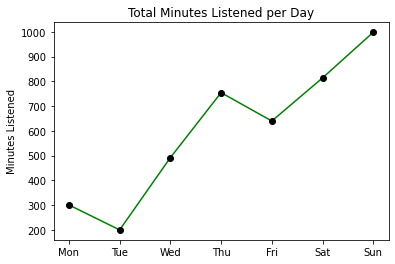

In [14]:
# Creating the graph to display minutes listened on each day

min_day = df.groupby('wkday')['minsPlayed'].sum().reindex(day)
plt.plot(min_day, color='Green', marker="o", mfc='black', mec= "k")
#mfc= 'marker face color', mec= 'marker edge color'
plt.ylabel('Minutes Listened')
plt.title('Total Minutes Listened per Day')
plt.show()

Findings: Here we can see that the user listened to music the most on Sunday and the least on Tuesday . With this information, new music ads should be played on those days because the user is more likely to see it!

## Goal: Top 10 Streamed Songs

In [15]:
# View the number of times each track name appears in the data
pd.value_counts(df['trackName'])

Ты пари              48
Kava                 43
Dirty Dirty          25
Hold Me Closer       24
Memento Interlude    22
                     ..
Milk                  1
Save Me               1
Бутылочка             1
Meaningless           1
Sex to Me             1
Name: trackName, Length: 269, dtype: int64

In [16]:
#Display the first 10 tracks in the "trackName" column
pd.value_counts(df['trackName']).head(10)

Ты пари                                        48
Kava                                           43
Dirty Dirty                                    25
Hold Me Closer                                 24
Memento Interlude                              22
Cold Heart - PNAU Remix                        19
Я знаю какая ты (feat. Скриптонит & Maqlao)    17
I Got Love                                     16
Чи разом?                                      15
Broken Soul                                    15
Name: trackName, dtype: int64

Text(0, 0.5, 'Count')

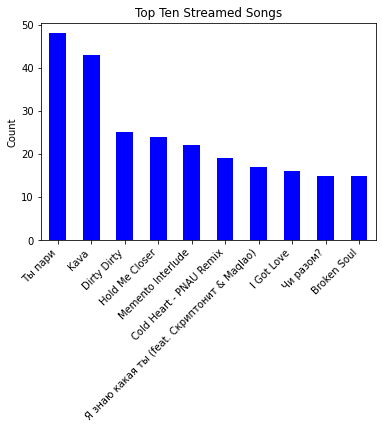

In [17]:
#Create a bar graph showing top 10 played song and times they were streamed with in the period of time
pd.value_counts(df['trackName']).head(10).plot(kind='bar',color='blue')
plt.xticks(rotation=45, ha='right')
plt.title('Top Ten Streamed Songs')
plt.ylabel('Count')

Findings: Most listened to song is ' Ты пари '. With these songs in mind, Spotify may want to create an algorithm that auto-plays music in the same genres or artists for this user.

### Goal: Top 20 Streamed Artists

In [18]:
#Count the times an artist was streamed 
pd.value_counts(df['artistName'])

JONY                67
Charlotte Cardin    63
Blank & Jones       51
Elton John          45
MamaRika            44
                    ..
Frederick Delius     1
Always Never         1
Not Tudor            1
Edoardo Más          1
Marie Denis          1
Name: artistName, Length: 134, dtype: int64

In [19]:
#Print the top 20 streamed artists 
pd.value_counts(df['artistName']).head(20)

JONY                 67
Charlotte Cardin     63
Blank & Jones        51
Elton John           45
MamaRika             44
Zivert               41
Jay Mellock          38
Spa                  35
Billie Eilish        35
Manizha              27
Skryptonite          25
Yolka                25
LOBODA               24
Dinos                22
Kovacs               20
Carla Morrison       18
KOLA                 18
104                  17
MiyaGi & Endspiel    16
Alla Pugacheva       15
Name: artistName, dtype: int64

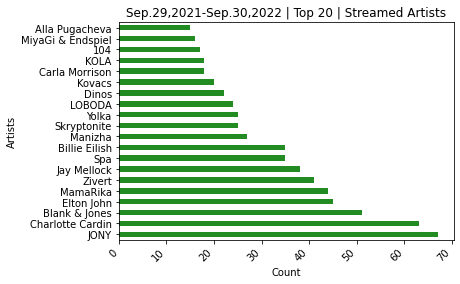

In [20]:
pd.value_counts(df['artistName']).head(20).plot(kind='barh', color='forestgreen')
plt.xticks(rotation=45, ha='right')
plt.title('Sep.29,2021-Sep.30,2022 | Top 20 | Streamed Artists')
plt.ylabel('Artists')
plt.xlabel('Count')
figsize=(50,50)

Findings: 'JONY' is the most listened to artists! Spotify should target more of their songs or at least auto-play these songs when a playlists is finished or songs are not queued. This may expose the are user to new songs making them more likely to use the app!

### Goal: How many songs belongs to each artist on your library ?

In [22]:
#Import 'YourLibraty' data
Libraty = pd.read_excel('/Users/administrator/Desktop/gitHUB/Creating_visualizations_with_Spotify_data_ /MyData/YourLibrary.json.xlsx')
Libraty

def load_data(file):                                                    
    return pd.read_csv(file, sep = ",", index_col = False, header=0)
Libraty=pd.read_excel("YourLibrary.json.xlsx")
Libraty

,tracks,artist,album,track,uri,albums,artist.1,album.1,uri.1,shows,...,publisher,uri.2,bannedTracks,artist.2,album.2,track.1,uri.3,artists,name.1,uri.4
0,NaN,Jay Mellock,Broken Soul,Broken Soul,spotify:track:1d3ikueIIKvezg4Vd8VY5q,NaN,Autograf,The Ace Of You,spotify:album:10iaqipBlcIzyaXNuOxVaN,NaN,...,libo/libo,spotify:show:1KEx5UrTPlqyqcCFmbBZob,NaN,Dua Lipa,Future Nostalgia,Love Again,spotify:track:4rPkN1FMzQyFNP9cLUGIIB,NaN,Autograf,spotify:artist:0FVj4JuzTyudaXAwfqDQ20
1,NaN,GUF,Лето на ветер,Лето на ветер,spotify:track:5EGqVNNOy1yv1xpQI05qwq,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Haiva Ru,Swim,Swim,spotify:track:2vbwY93OSQjlbEQvl6GYjy,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Adler Kotsba,Запах моей женщины,Запах моей женщины,spotify:track:5iNedYwH8uAYVasEQKYq4R,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Manizha,ЯIAM,мама,spotify:track:4VwsOTFL2Mw3dzNj0c9vJq,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,NaN,MiyaGi & Endspiel,NaN,NaN,spotify:artist:6L5bLEtpxwd0KOdOr3gtW4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,NaN,Swanky Tunes,NaN,NaN,spotify:artist:06cLuOP0p7VAnBnqil1eWX,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,The Weeknd,NaN,NaN,spotify:artist:1Xyo4u8uXC1ZmMpatF05PJ,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
115,NaN,Trey Lorenz,NaN,NaN,spotify:artist:23kP8xlQifcAV4nd84iHbW,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
Libraty.count()

tracks            0
artist          117
album           106
track           106
uri             117
albums            0
artist.1          1
album.1           1
uri.1             1
shows             0
name              1
publisher         1
uri.2             1
bannedTracks      0
artist.2          1
album.2           1
track.1           1
uri.3             1
artists           0
name.1            1
uri.4             1
dtype: int64

In [25]:
Libraty1=Libraty.drop(['albums' , 'artist.1', 'album.1', 'uri.1','shows', 'publisher',
                        'uri.2', 'bannedTracks', 'artist.2', 'album.2', 'track.1', 'uri.3',
                        'artists','name.1','uri.4'], axis = 1)

In [26]:
Libraty1.count()

tracks      0
artist    117
album     106
track     106
uri       117
name        1
dtype: int64

In [27]:
Libraty1['artist'].nunique()

81

In [28]:
#count of songs on each artist
pd.value_counts(Libraty1['artist'])

Blank & Jones        4
Zivert               4
The Weeknd           3
MiyaGi & Endspiel    3
Billie Eilish        3
                    ..
Havana               1
Mostus               1
Chicane              1
Nicholas Hill        1
Mitch Oliver         1
Name: artist, Length: 81, dtype: int64

Text(0.5, 0, 'Artist Names')

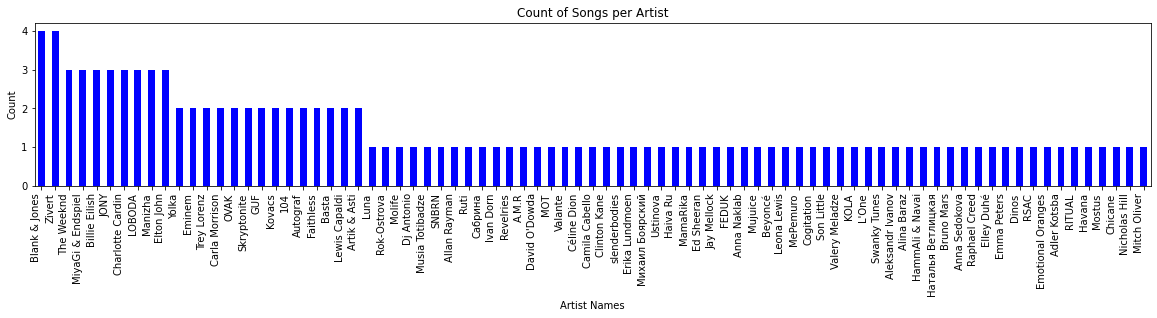

In [31]:
#Create a bar graph count of songs on each artist
pd.value_counts(Libraty1['artist']).plot(kind='bar',color='blue')
plt.rcParams["figure.figsize"] = (20,10)
plt.xticks(rotation=90, ha='right')
plt.title('Count of Songs per Artist')
plt.ylabel('Count')
plt.xlabel('Artist Names')